In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test_df = pd.read_csv('test_measure.csv')
type(test_df)

pandas.core.frame.DataFrame

In [55]:
test_df.head()

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27.0,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23.0,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29.0,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28.0,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28.0,14.6,2_1,2


In [5]:
sub_df = pd.read_csv('subject-info.csv')
type(sub_df)

pandas.core.frame.DataFrame

In [57]:
sub_df.head()

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test,BMI,Humidity_levels
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1,0.001837,Normal
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1,0.001822,Normal
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1,0.001797,Normal
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1,0.001967,Normal
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1,0.001868,Normal


In [ ]:
#17)Display a histogram showing the distribution of athletes by their BMI values.

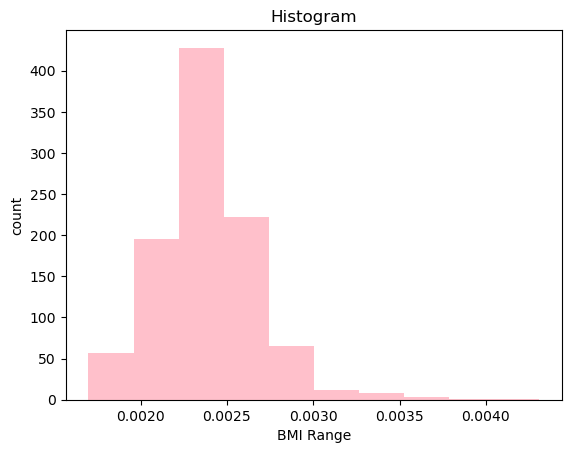

In [9]:
sub_df['BMI'] = sub_df['Weight']/sub_df['Height']**2
plt.hist(sub_df['BMI'],bins=10, color='pink' )
plt.xlabel('BMI Range')
plt.ylabel('count')
plt.title('Histogram')
plt.show()


In [11]:
#18)Who is the tallest participant in the dataset?What is  his/her Vo2 kg/ml?"

max_height = sub_df['Height'].max()
tallest_ids = sub_df[sub_df['Height'] == max_height]['ID']
tallest_vo2 = test_df[test_df['ID'].isin(tallest_ids)]
unique_vo2_values = tallest_vo2['VO2'].unique()
for pid in tallest_ids:
    vo2_values = tallest_vo2[tallest_vo2['ID'] == pid]['VO2'].unique()
    for vo2 in vo2_values:
        print(f"Tallest Participant: {pid} with VO2: {vo2} kg/ml")

Tallest Participant: 94 with VO2: 700.0 kg/ml
Tallest Participant: 94 with VO2: 935.0 kg/ml
Tallest Participant: 94 with VO2: 697.0 kg/ml
Tallest Participant: 94 with VO2: 815.0 kg/ml
Tallest Participant: 94 with VO2: 853.0 kg/ml
Tallest Participant: 94 with VO2: 892.0 kg/ml
Tallest Participant: 94 with VO2: 939.0 kg/ml
Tallest Participant: 94 with VO2: 1054.0 kg/ml
Tallest Participant: 94 with VO2: 1055.0 kg/ml
Tallest Participant: 94 with VO2: 1120.0 kg/ml
Tallest Participant: 94 with VO2: 1162.0 kg/ml
Tallest Participant: 94 with VO2: 1178.0 kg/ml
Tallest Participant: 94 with VO2: 1173.0 kg/ml
Tallest Participant: 94 with VO2: 1170.0 kg/ml
Tallest Participant: 94 with VO2: 1115.0 kg/ml
Tallest Participant: 94 with VO2: 1148.0 kg/ml
Tallest Participant: 94 with VO2: 1182.0 kg/ml
Tallest Participant: 94 with VO2: 1234.0 kg/ml
Tallest Participant: 94 with VO2: 1311.0 kg/ml
Tallest Participant: 94 with VO2: 1376.0 kg/ml
Tallest Participant: 94 with VO2: 1467.0 kg/ml
Tallest Participant:

In [13]:
#19)"What is the highest recorded heart rate ?Identify the patient with the highest recorded heart rate."
max_heartRate = test_df['HR'].max()
max_hr_ids = test_df[test_df['HR'] == max_heartRate]['ID'].unique()
for pid in max_hr_ids:
    print(f"Patient ID: {pid} with maximum heart rate: {max_heartRate}")

Patient ID: 619 with maximum heart rate: 226.0


In [53]:
#20)What is the VO2 max(mL/kg/min) of the shortest male athlete? --sex column 0 is for male

male_athletes = sub_df[sub_df['Sex'] == 0]

min_height = male_athletes['Height'].min()
min_height_ids = male_athletes[male_athletes['Height'] == min_height]['ID']

shortest_male_vo2 = test_df[test_df['ID'].isin(min_height_ids)].copy()

def get_weight_for_id(athlete_id):
    weight = sub_df[sub_df['ID'] == athlete_id]['Weight'].values
    return weight[0] if len(weight) > 0 else None  

shortest_male_vo2['Weight'] = shortest_male_vo2['ID'].apply(get_weight_for_id)
shortest_male_vo2['VO2_max'] = shortest_male_vo2['VO2'] / shortest_male_vo2['Weight']

for index, row in shortest_male_vo2.iterrows():
    print(f"Shortest Male Athlete ID: {row['ID']} has VO2 max: {row['VO2_max']} mL/kg/min")



Shortest Male Athlete ID: 367 has VO2 max: 6.454545454545454 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 6.151515151515151 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 6.424242424242424 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 7.2727272727272725 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 8.242424242424242 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 8.257575757575758 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 8.287878787878787 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 9.424242424242424 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 9.484848484848484 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 9.984848484848484 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 10.227272727272727 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 9.924242424242424 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 10.757575757575758 mL/kg/min
Shortest Male Athlete ID: 367 has VO2 max: 11.484848484848484 mL/kg/min
Sh

                         VO2         VCO2
Humidity_levels                          
High             2017.422222  2004.155556
Low              2801.000000  2910.500000
Normal           2040.545977  2015.843678


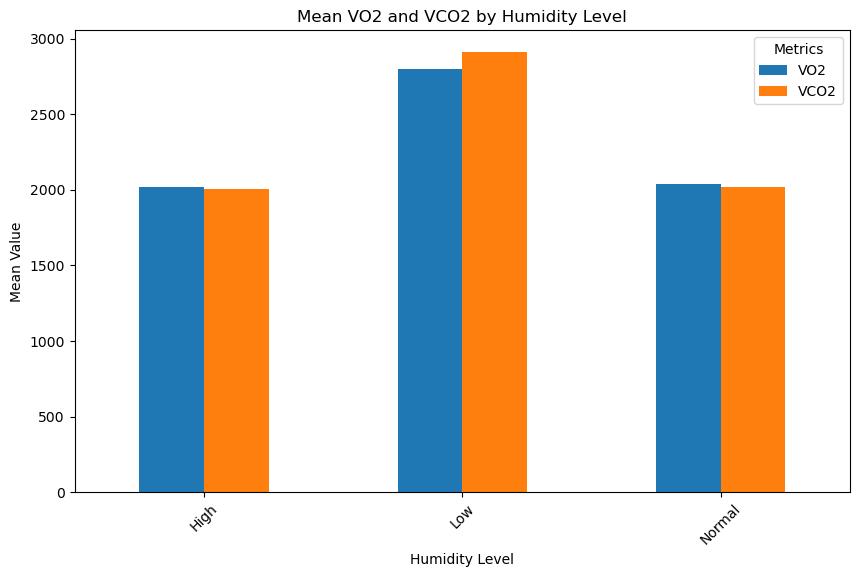

In [37]:
#21)"Analyze the mean VO2 and VCO2 values by humidity level using a Multiseries Bar Chart.
#Based on your findings, how does low humidity affect respiratory and cardiovascular function during exercise (VO2 and VCO2) ?
#Humidity level (<30 - Low) , (30 to 60 - Normal ) ,(>60 - High)"
def humidity_levels(humidity):
    if humidity < 30:
        return 'Low'
    elif humidity >= 30 and humidity <= 60:
        return 'Normal'
    elif humidity > 60 :
        return 'High'
        
sub_df['Humidity_levels'] = sub_df['Humidity'].apply(humidity_levels)
humidity_means = test_df.groupby(sub_df['Humidity_levels'])[['VO2', 'VCO2']].mean()

humidity_means.plot(kind='bar', figsize=(10, 6))
print(humidity_means)

plt.title('Mean VO2 and VCO2 by Humidity Level')
plt.xlabel('Humidity Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()


In [ ]:
#22)Display the average speed of each participant  in ' peak exercise' based on RER


In [73]:
#23)"Assign one of the following 5 heart rate zones for every Athletes  and add this as a column to a new table with all unique IDs. Exclude Warm-Up Phase
 #Zone 1 (recovery/easy)       <100 HR max
 #Zone 2 (aerobic/base)        100-120 HR max
 #Zone 3 (tempo)        120-135 HR max
 #Zone 4 (lactate threshold)        135-155 HR max
 #Zone 5 (anaerobic)        155+ HR max and above""


def assign_heartrate(hr):
    if hr < 100:
        return "Zone 1 (recovery/easy)"
    elif hr>=100 and hr<=120:
        return "Zone 2 (Aerobic/Base)"
    elif hr>120 and hr<135:
        return "Zone 3 (tempo)"
    elif hr>=135 and hr<155:
        return "Zone 4 (lactate threshold)"
    elif hr>=155:
        return "Zone 5 (anaerobic)"
        
#test_df_no_warmup = test_df[test_df['Phase'] != 'Warm-Up']
heart_rate_zone = test_df_no_warmup.groupby('ID')['HR'].mean().reset_index()
heart_rate_zone['HeartRateZone'] = heart_rate_zone['HR'].apply(assign_heartrate)

print(heart_rate_zone)




      ID          HR               HeartRateZone
0      1  132.676056              Zone 3 (tempo)
1      2  138.401667  Zone 4 (lactate threshold)
2      3  168.208264          Zone 5 (anaerobic)
3      4  153.019493  Zone 4 (lactate threshold)
4      5  158.765517          Zone 5 (anaerobic)
..   ...         ...                         ...
852  853  165.975930          Zone 5 (anaerobic)
853  854  107.629699       Zone 2 (Aerobic/Base)
854  855  133.420752              Zone 3 (tempo)
855  856  128.864465              Zone 3 (tempo)
856  857  167.268390          Zone 5 (anaerobic)

[857 rows x 3 columns]


In [79]:
#24)Find the athlete who has got optimal respiratory stability based on the measure of  Breathing Interval variability over time.

# Assuming Respiration rate, in respiration per minute and volume of air breathed in and out per minute

athlete_metrics = test_df.groupby('ID').agg({
    'RR': 'std',  
    'VE': 'std' 
}).reset_index()

athlete_metrics['Breathing_Variability'] = athlete_variability[['RR', 'VE']].mean(axis=1)

optimal_athlete = athlete_metrics.loc[athlete_metrics['Breathing_Variability'].idxmin()]

print("Athlete with optimal respiratory stability (lowest Breathing Interval Variability):")
print(optimal_athlete)


Athlete with optimal respiratory stability (lowest Breathing Interval Variability):
ID                       235.000000
RR                         3.224839
VE                        10.547990
Breathing_Variability      6.886414
Name: 234, dtype: float64


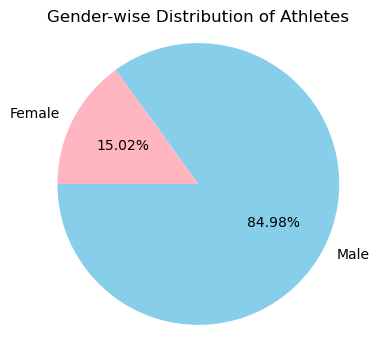

In [15]:
#25)Generate a pie chart to show the gender-wise distribution of athletes.

gender_cnts = sub_df['Sex'].value_counts().sort_index()
labels = ['Male', 'Female']
plt.figure(figsize=(4, 4))
plt.pie(gender_cnts, labels=labels, autopct='%1.2f%%', colors=['skyblue', 'lightpink'], startangle=180)
plt.title('Gender-wise Distribution of Athletes')
plt.axis('equal')
plt.show()